In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
dir_datasets = '/content/drive/MyDrive/DataScience/Data Science Course/0.Datasets/{}'
df_netflix = pd.read_csv(dir_datasets.format('netflix_titles.csv'))

In [4]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df_netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [7]:
# le pasamos un cero en texto porque luego necesitamos pasar ese cero a numero, 
# si le pasamos directamente un cero en numero lo calificara como NaN
df_netflix['duration'].fillna('0', inplace=True)

# **SPLIT()**

In [8]:
# Extraer datos datos de la columna "duration" usando split() y extract()
df_movies = df_netflix[df_netflix['type'] == 'Movie']

df_movies = df_movies.assign(minutes=df_movies['duration'].str.split(expand=True)[0].astype(int))
#df_movies['minutes'] = df_movies['duration'].str.split(expand=True)[0].astype(int) # expand = crea una columna a cada separacion que hizo

In [9]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


# **IDENTIFICANDO VALORES ATIPICOS**

Vemos que en el histograma tenemos un los valores atipicos, que son los valores de los lados, que representan muy pocos datos en sus barras, son valores que no tienen mucha representacion dentro del histograma ya que son muy pocos

<AxesSubplot:ylabel='Frequency'>

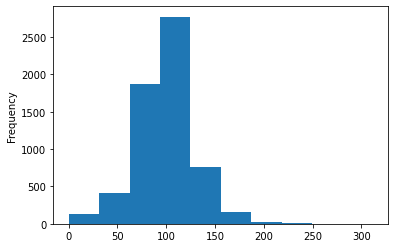

In [16]:
df_movies['minutes'].plot(kind='hist', bins=10)

In [17]:
# aca podemos ver los numeros del histograma un poco mas representado numericamente
# vemos que los valores atipicos estan entre 0 hasta 31.2 y 218 hasta 312, 
# esos son los valores que estan fuera 
df_movies['minutes'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: minutes, dtype: int64

In [20]:
df_movies[(df_movies['minutes']>31.2) & (df_movies['minutes']<218)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [21]:
# aca vemos los valores atipicos, solo negamos la condicion de los valores reales
df_movies[~((df_movies['minutes']>31.2) & (df_movies['minutes']<218))].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States","September 1, 2021",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,229
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...,13
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12 min,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12


# **BLOXPLOT PARA IDENTIFICAR VALORES ATIPICOS CON DATA NUMERICA**


<AxesSubplot:>

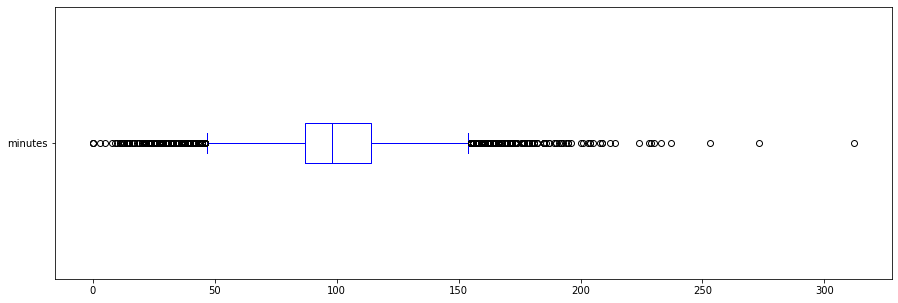

In [24]:
df_movies['minutes'].plot(kind='box', 
                          vert=False, 
                          color='blue', 
                          figsize=(15,5))

In [25]:
''' 
revision de valores estadisticos, para poder saber cuales son los valores importantes de este boxsplot 
debemos utilizar las siguientes formulas:

# IQR = Q3 - Q1
# Q1 - 1.5*IQR : valor minimo
# Q3 + 1.5*IQR : valor maximo


NOTAS:
IQR : toda la representacion del valor de la caja
Q1 : 25%
Q2 : 50% 
Q3 : 75%
'''

df_movies['minutes'].describe()

count    6131.000000
mean       99.528462
std        28.369284
min         0.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minutes, dtype: float64

In [26]:
# IQR = Q3 - Q1
# Q1 - 1.5*IQR : valor minimo
# Q3 + 1.5*IQR : valor maximo
min_boxplot = 87 - 1.5*(114-87)
max_boxplot = 114 + 1.5*(114-87)

print(min_boxplot) # valor minimo : es la primer raya azul vertical del bloxplot
print(max_boxplot) # valor maximo : es la ultima raya azul vertical del bloxplot

46.5
154.5


*    **Como resultado de las formulas estadisticas, los valores atipicos son los valores que sean menores a 46.5 y mayores a 154.5, por lo que las peliculas que sean menores a 46.5 y mayores a 154.5 minutos no deben ser analizadas.**
*    **Tambien se puede decir que las peliculas que se deben analizar son las que tienen que estar entre 46.5 y 154.5 minutos.**

# **USAR GRAFICO DE BARRAS PARA IDENTIFICAR VALORES ATIPICOS DENTRO DE LA DATA**

In [28]:
df_movies['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<AxesSubplot:>

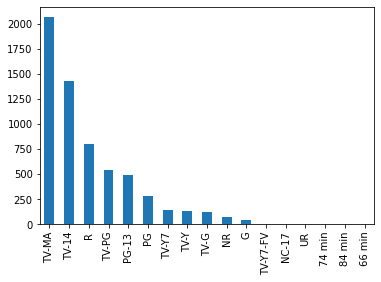

In [30]:
df_movies['rating'].value_counts().plot(kind='bar')
'''
Como podemos ver, los valores atipicos son los valores que no se pueden representar, 
que se encuentran de lado derecho del grafico de barras

'''

In [50]:
len(df_movies[(df_movies['rating']=='TV-Y7-FV') | 
          (df_movies['rating']=='NC-17') |
          (df_movies['rating']=='UR') | 
          (df_movies['rating']=='74 min') |
          (df_movies['rating']=='84 min') |
          (df_movies['rating']=='66 min')])

14